In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waterdataset/train.csv
/kaggle/input/waterdataset/test.csv


In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [7]:
import nltk

In [8]:
data = pd.read_csv('/kaggle/input/waterdataset/train.csv')
data.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,<p>😅The pH value observed is: 0.2644088544860...,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,<p>😇The solution's pH level is 0.012034498894...,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,<br>😀The pH reading measures 0.491167423175516...,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,<h1>😅The water sample's pH level is 0.4865531...,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,<p>😍The observed pH value of 0.07548804288855...,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [9]:
data['ph']

0       <p>😅The pH value observed is:  0.2644088544860...
1       <p>😇The solution's pH level is  0.012034498894...
2       <br>😀The pH reading measures 0.491167423175516...
3       <h1>😅The water sample's pH level is  0.4865531...
4       <p>😍The observed pH value of  0.07548804288855...
                              ...                        
9995    <br>😍The observed pH value of  0.0666474523593...
9996    <p>😀The observed pH value of  0.87789992053641...
9997    <h1>😇The water sample's pH level is  0.0547191...
9998    <h1>😒The solution's pH level is  0.86477809896...
9999    <p>😍The water sample's pH level is  0.69271759...
Name: ph, Length: 10000, dtype: object

In [10]:

data.shape

(10000, 11)

In [11]:
data.info

<bound method DataFrame.info of       Index                                                 ph  \
0         0  <p>😅The pH value observed is:  0.2644088544860...   
1         1  <p>😇The solution's pH level is  0.012034498894...   
2         2  <br>😀The pH reading measures 0.491167423175516...   
3         3  <h1>😅The water sample's pH level is  0.4865531...   
4         4  <p>😍The observed pH value of  0.07548804288855...   
...     ...                                                ...   
9995   9995  <br>😍The observed pH value of  0.0666474523593...   
9996   9996  <p>😀The observed pH value of  0.87789992053641...   
9997   9997  <h1>😇The water sample's pH level is  0.0547191...   
9998   9998  <h1>😒The solution's pH level is  0.86477809896...   
9999   9999  <p>😍The water sample's pH level is  0.69271759...   

                                               Hardness  \
0     <br>😒With a hardness level of  2.6735383052025...   
1     <h1>😀The water hardness is measured at  2.6303...  

In [12]:
data.nunique()


Index              10000
ph                 10000
Hardness           10000
Solids             10000
Chloramines        10000
Sulfate            10000
Conductivity       10000
Organic_carbon     10000
Trihalomethanes    10000
Turbidity          10000
Potability         10000
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            10000 non-null  int64  
 1   ph               10000 non-null  object 
 2   Hardness         10000 non-null  object 
 3   Solids           10000 non-null  object 
 4   Chloramines      10000 non-null  float64
 5   Sulfate          10000 non-null  float64
 6   Conductivity     10000 non-null  float64
 7   Organic_carbon   10000 non-null  float64
 8   Trihalomethanes  10000 non-null  float64
 9   Turbidity        10000 non-null  object 
 10  Potability       10000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


Potability
1.252351    1
0.781195    1
1.026637    1
0.713929    1
1.363007    1
           ..
0.661707    1
1.016925    1
0.579258    1
0.967965    1
0.669703    1
Name: count, Length: 10000, dtype: int64

Error in callback <function _draw_all_if_interactive at 0x7ea2f9484670> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



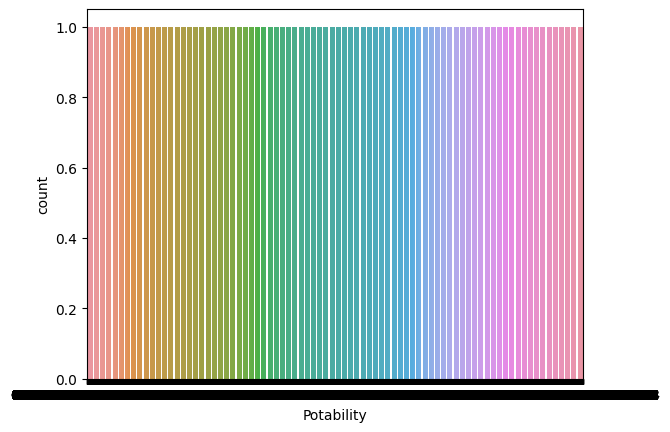

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x=data['Potability'])
data.Potability.value_counts()

In [15]:
sns.displot(data.ph)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x7ea2f946f910> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

KeyboardInterrupt: 

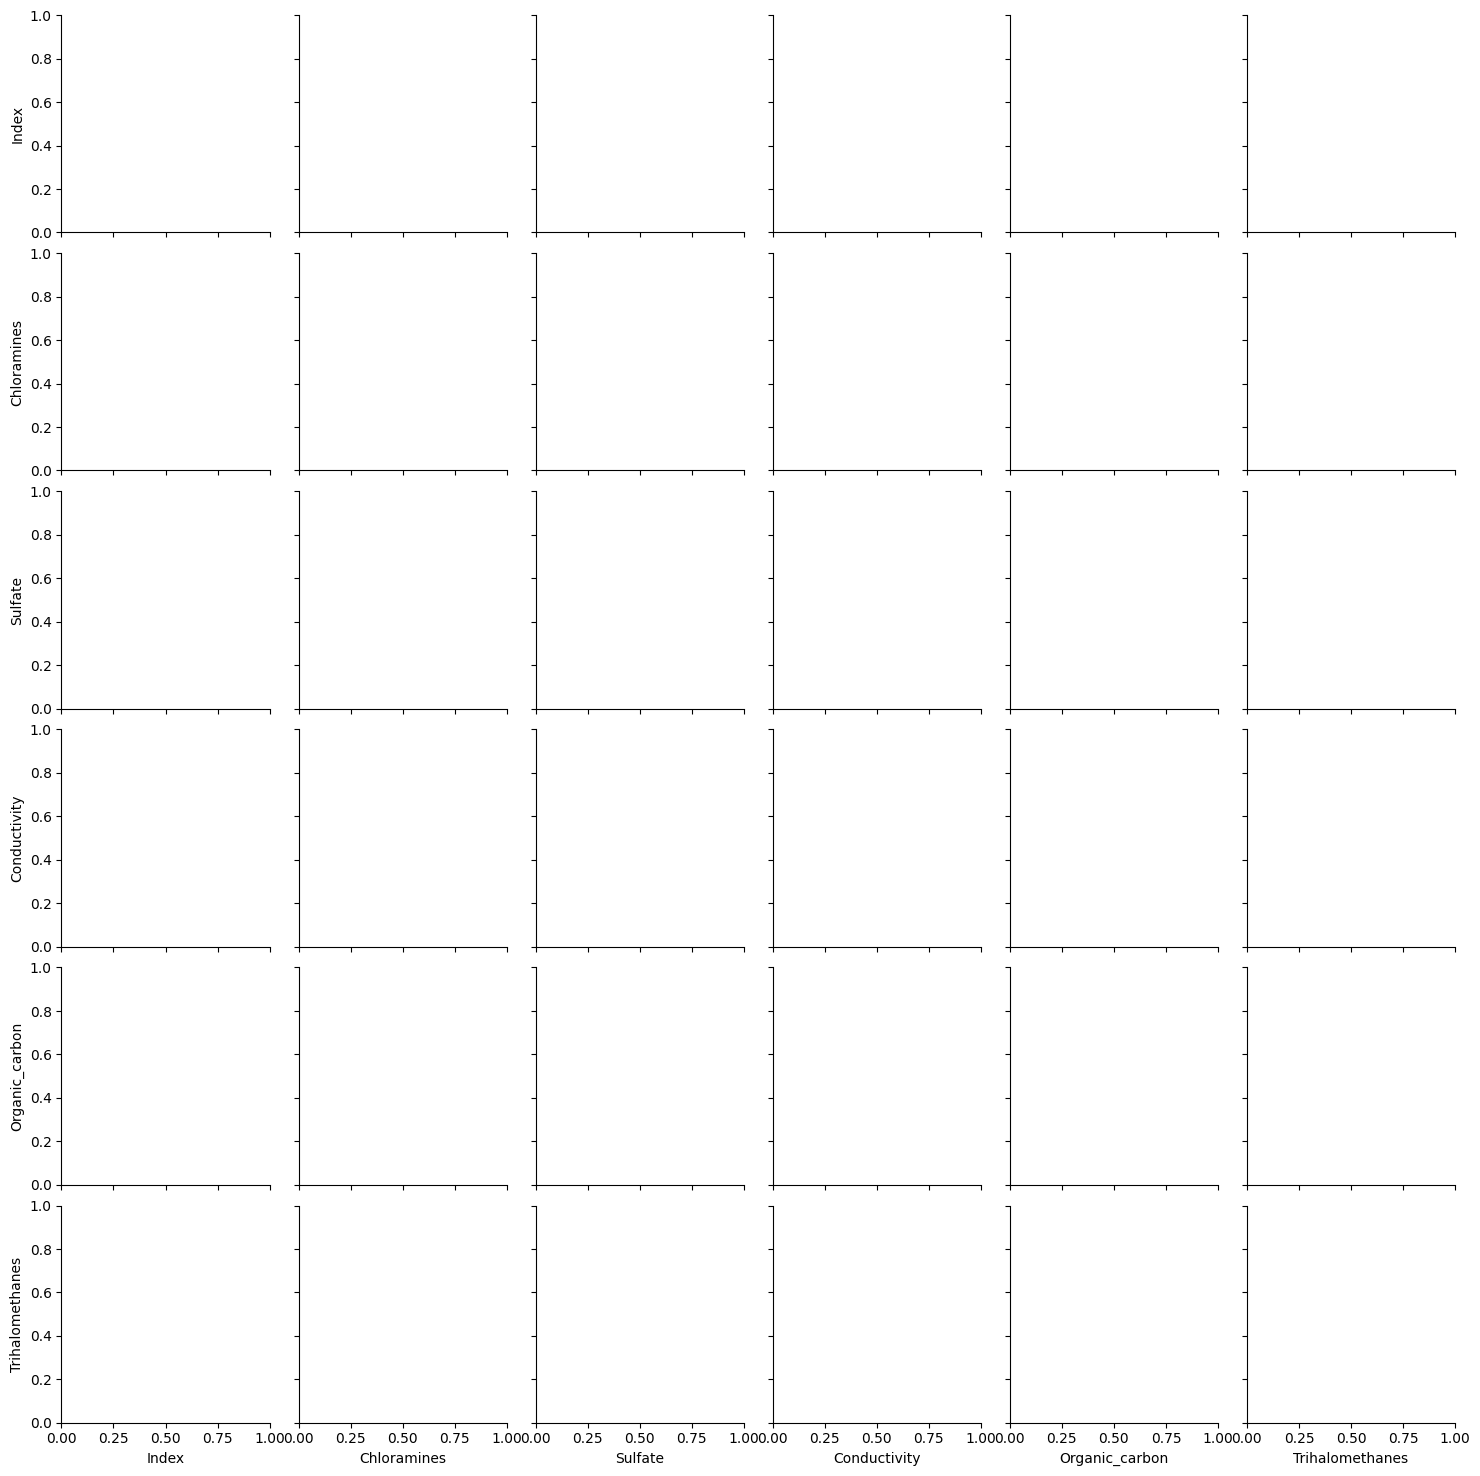

In [16]:
sns.pairplot(data=data,hue='Potability')

In [ ]:
for column in data.columns:
    plt.figure()
    data.boxplot([column])

In [ ]:

print(data.columns)


print(data.head())

for column in data.columns:
    plt.figure()
    data.boxplot(column=[column])  
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
data.tail()

In [ ]:
data.isna().sum()

In [17]:
import pandas as pd
import re

def clean_numeric_value(text):

    if pd.isna(text):
        return text
    matches = re.findall(r'(\d+\.?\d*)', str(text))
    return float(matches[0]) if matches else text


data['ph'] = data['ph'].apply(clean_numeric_value)
data['Hardness'] = data['Hardness'].apply(clean_numeric_value)
data['Solids'] = data['Solids'].apply(clean_numeric_value)
data['Turbidity']=data['Turbidity'].apply(clean_numeric_value)
print(data['ph'])
print(data['Hardness'])
print(data['Solids'])

0       0.264409
1       0.012034
2       0.491167
3       1.000000
4       0.075488
          ...   
9995    0.066647
9996    0.877900
9997    1.000000
9998    1.000000
9999    0.692718
Name: ph, Length: 10000, dtype: float64
0       2.673538
1       1.000000
2       2.000000
3       2.000000
4       1.656818
          ...   
9995    1.000000
9996    2.000000
9997    1.106346
9998    2.560947
9999    1.224377
Name: Hardness, Length: 10000, dtype: float64
0       2.336743
1       2.495853
2       1.000000
3       1.000000
4       1.095344
          ...   
9995    1.541680
9996    1.389024
9997    2.180081
9998    1.623588
9999    2.000000
Name: Solids, Length: 10000, dtype: float64


In [18]:
data

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.000000,1.252351
1,1,0.012034,1.000000,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,2,0.491167,2.000000,1.000000,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,3,1.000000,2.000000,1.000000,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.000000,0.890722
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.066647,1.000000,1.541680,1.980678,2.129723,1.629682,1.228212,1.401602,1.398645,1.003687
9996,9996,0.877900,2.000000,1.389024,1.575261,3.389656,1.808995,0.984893,1.418192,2.000000,0.857710
9997,9997,1.000000,1.106346,2.180081,2.346026,1.471835,2.987930,2.089299,1.898912,2.000000,1.369970
9998,9998,1.000000,2.560947,1.623588,1.347337,2.646122,1.684377,1.372873,1.685423,0.928454,0.821249


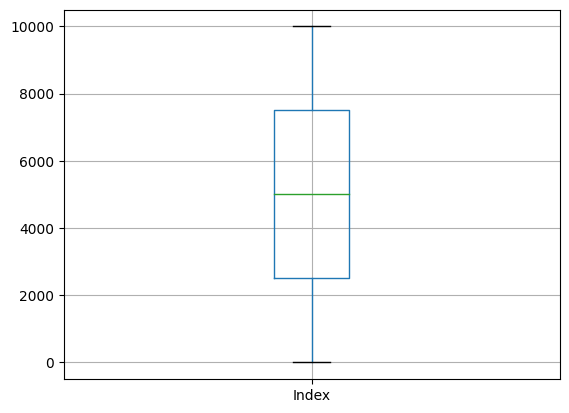

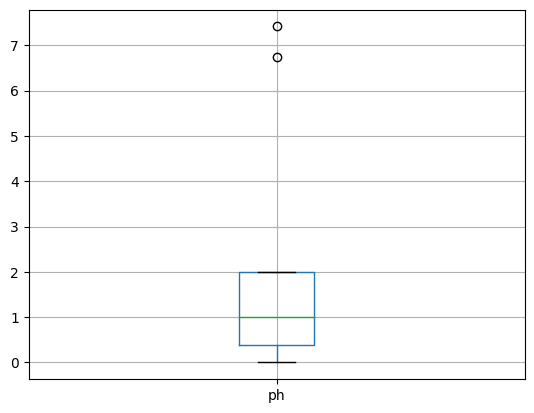

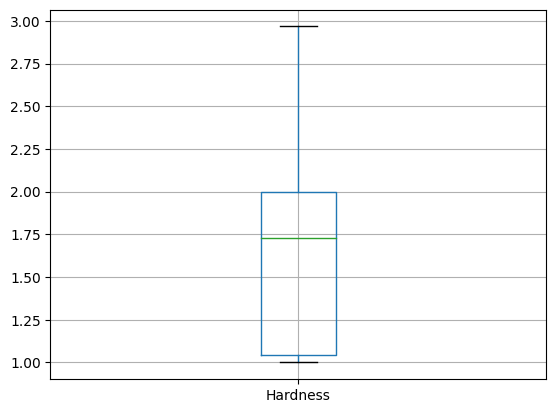

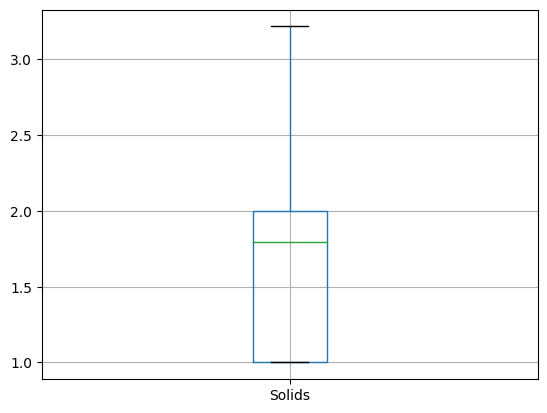

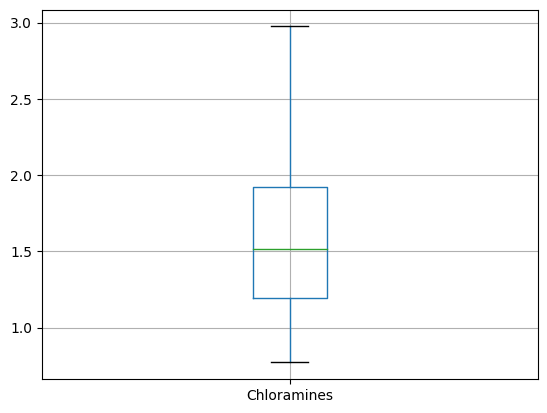

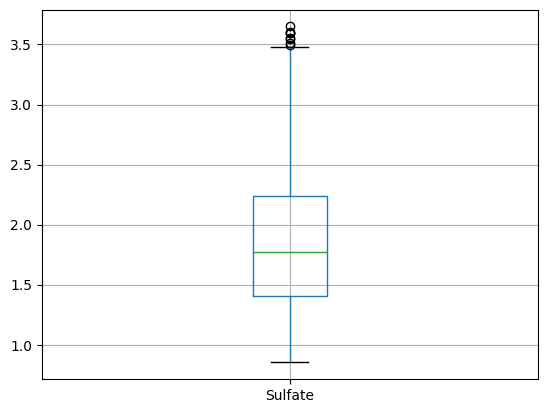

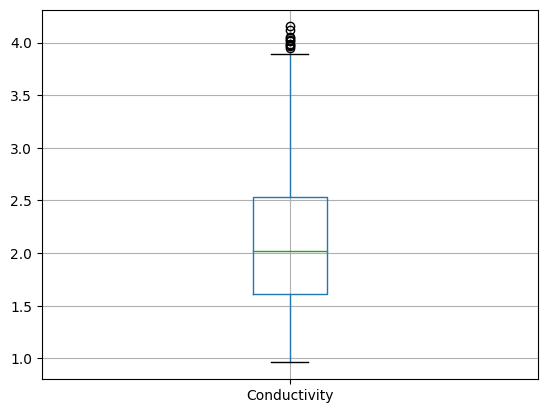

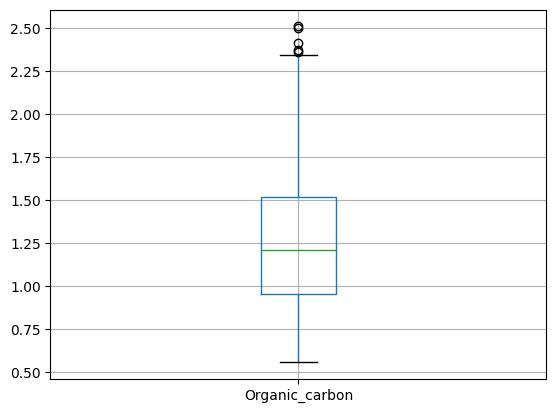

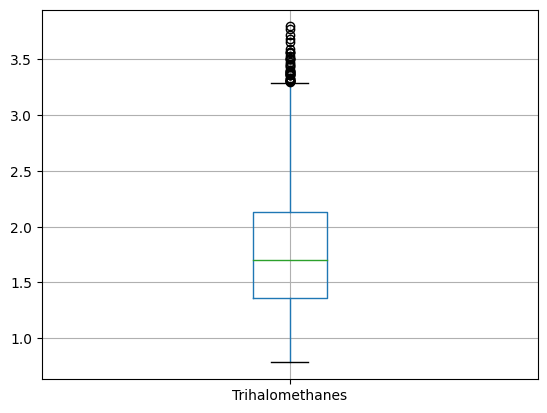

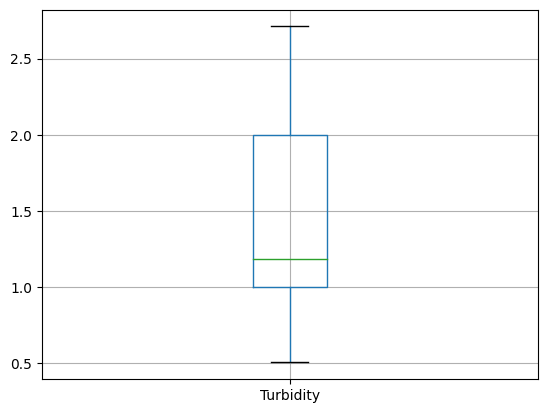

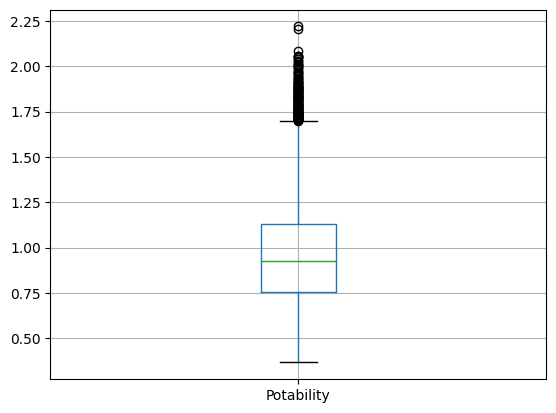

In [19]:
for column in data.columns:
    plt.figure()
    data.boxplot([column])

In [20]:

lower_bound = 2  
upper_bound = 11  
filtered_data= data[(data['ph'] >= lower_bound) & (data['ph'] <= upper_bound)]

In [21]:
print("Original DataFrame shape:", data.shape)
print("Filtered DataFrame shape:", data.shape)

Original DataFrame shape: (10000, 11)
Filtered DataFrame shape: (10000, 11)


In [22]:
data.corr()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,1.000000,-0.011174,0.003671,-0.012731,-0.006839,-0.005622,-0.004613,-0.000576,-0.005718,-0.015595,0.018535
ph,-0.011174,1.000000,0.005287,-0.003633,0.020043,0.038225,-0.018940,-0.036525,-0.047124,-0.022920,-0.093217
Hardness,0.003671,0.005287,1.000000,0.019929,-0.098101,0.092677,0.049459,-0.150869,-0.050688,0.027893,0.038008
Solids,-0.012731,-0.003633,0.019929,1.000000,-0.049355,-0.111241,0.139658,-0.105820,0.056138,0.011489,0.002551
Chloramines,-0.006839,0.020043,-0.098101,-0.049355,1.000000,0.099327,-0.100761,0.084435,-0.111426,0.083091,0.091082
Sulfate,-0.005622,0.038225,0.092677,-0.111241,0.099327,1.000000,0.103847,-0.102436,0.206470,-0.070311,-0.087696
Conductivity,-0.004613,-0.018940,0.049459,0.139658,-0.100761,0.103847,1.000000,0.001086,0.096684,-0.112183,-0.190306
Organic_carbon,-0.000576,-0.036525,-0.150869,-0.105820,0.084435,-0.102436,0.001086,1.000000,0.193907,0.025589,0.109229
Trihalomethanes,-0.005718,-0.047124,-0.050688,0.056138,-0.111426,0.206470,0.096684,0.193907,1.000000,-0.039625,0.108381
Turbidity,-0.015595,-0.022920,0.027893,0.011489,0.083091,-0.070311,-0.112183,0.025589,-0.039625,1.000000,-0.027418


In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')  # Change 'coolwarm' to your desired color map
plt.show()

In [25]:
data.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.000000,1.252351
1,1,0.012034,1.000000,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,2,0.491167,2.000000,1.000000,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,3,1.000000,2.000000,1.000000,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.000000,0.890722


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
x = data.drop(['Potability'],axis =1)
y= data.Potability

In [32]:
from sklearn.preprocessing import StandardScaler



scale =StandardScaler()
scaled =scale.fit_transform(x)
scaled_df =pd.DataFrame(scaled,columns =x.columns)
scaled_df.head()


,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.731878,-1.020810,1.931148,1.163354,-0.319781,-1.016403,-0.896916,-1.541409,0.456392,-0.810604
1,-1.731531,-1.387567,-1.228900,1.448992,-1.462522,-1.244527,-0.601845,-0.989931,0.064474,0.244285
2,-1.731185,-0.691278,0.659343,-1.236415,-0.156206,-0.273297,0.357335,-0.603900,-0.437227,-0.790964
3,-1.730838,0.048171,0.659343,-1.236415,2.373279,2.223255,0.500904,-0.187553,-1.050060,-0.259523
4,-1.730492,-1.295354,0.011331,-1.065250,1.299382,-0.610699,-0.190613,-0.044954,-0.358707,-0.810604


In [71]:
y.shape

(5000,)

In [77]:
scaled_df=scaled_df.drop(['Potability'],axis =1)

In [84]:
scaled_df=scaled_df.sample(n=5000, replace=True)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [87]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.3, random_state=0)

In [88]:
X_test.shape

(1500, 10)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')


print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')



ValueError: Unknown label type: 'continuous'

In [40]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')


print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-----------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

ValueError: Unknown label type: 'continuous'

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=123)
rf.fit(X_train, y_train)
y_train_hat =rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')


print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-----------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


In [ ]:
from xgboost import XGBClassifier


In [ ]:
svm = XGBClassifier()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')


print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-----------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

In [93]:
test = pd.read_csv('/kaggle/input/waterdataset/test.csv')
test

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,10000,<br>😒The observed pH value of 0.4583260930518...,<h1>😁The observed water hardness of 1.7903445...,<p>😁Observing a solids concentration of 1.573...,1.540880,1.659576,2.156778,1.665096,2.105437,<br>😅The turbidity of the water is measured at...
1,10001,<br>😀The pH value observed is: 0.006163832801...,<p>😁The observed water hardness of 2.37971669...,<h1>😒The total solids content in the sample is...,1.225821,1.320635,2.251759,1.333259,1.480757,<p>😅The water sample exhibits a turbidity read...
2,10002,<h2>😀The pH reading measures 0.682188913921691...,<h2>😇The observed water hardness of 1.4080275...,<p>😍The total solids content in the sample is ...,2.430112,1.178618,1.614353,0.890702,1.824291,<br>😀Observing a turbidity value of 1.11871445...
3,10003,<p>😀The observed pH value of 0.56282397372454...,<br>😀The observed water hardness of 1.8369703...,<h1>😍The total solids content in the sample is...,1.910825,2.731592,1.626107,0.711949,2.598104,<br>😍The turbidity of the water is measured at...
4,10004,<h1>😇The pH reading measures 0.336142283595807...,<h1>😀The water hardness is measured at 1.5104...,<br>😀Observing a solids concentration of 2.33...,1.940168,1.269851,1.832447,0.947763,1.052021,<h1>😁The water sample exhibits a turbidity rea...
...,...,...,...,...,...,...,...,...,...,...
4995,14995,<h2>😀The observed pH value of 0.6239939359130...,<br>😅The water hardness is measured at 1.1073...,<h2>😅The total solids content in the sample is...,2.506261,2.521742,2.431430,1.233360,1.432172,<h1>😁Observing a turbidity value of 0.74767882...
4996,14996,<p>😀The pH reading measures 0.7886902033415697...,<p>😁The water hardness is measured at 1.54095...,<h2>😅The total solids content in the sample is...,1.424656,1.669503,1.355871,1.346191,1.074413,<h2>😅The water sample exhibits a turbidity rea...
4997,14997,<br>😇The observed pH value of 0.1814957015634...,<h2>😇With a hardness level of 1.8477287606496...,<h2>😀The water sample exhibits a total solids ...,1.957594,2.402041,1.730559,0.870003,1.449529,<p>😁The water sample exhibits a turbidity read...
4998,14998,<br>😇The pH reading measures 0.074331335960389...,<br>😒The observed water hardness of 1.4081573...,<br>😅The water sample exhibits a total solids ...,1.260259,1.481893,2.762865,1.905638,2.912864,<p>😁The water sample exhibits a turbidity read...


In [94]:
test.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,10000,<br>😒The observed pH value of 0.4583260930518...,<h1>😁The observed water hardness of 1.7903445...,<p>😁Observing a solids concentration of 1.573...,1.540880,1.659576,2.156778,1.665096,2.105437,<br>😅The turbidity of the water is measured at...
1,10001,<br>😀The pH value observed is: 0.006163832801...,<p>😁The observed water hardness of 2.37971669...,<h1>😒The total solids content in the sample is...,1.225821,1.320635,2.251759,1.333259,1.480757,<p>😅The water sample exhibits a turbidity read...
2,10002,<h2>😀The pH reading measures 0.682188913921691...,<h2>😇The observed water hardness of 1.4080275...,<p>😍The total solids content in the sample is ...,2.430112,1.178618,1.614353,0.890702,1.824291,<br>😀Observing a turbidity value of 1.11871445...
3,10003,<p>😀The observed pH value of 0.56282397372454...,<br>😀The observed water hardness of 1.8369703...,<h1>😍The total solids content in the sample is...,1.910825,2.731592,1.626107,0.711949,2.598104,<br>😍The turbidity of the water is measured at...
4,10004,<h1>😇The pH reading measures 0.336142283595807...,<h1>😀The water hardness is measured at 1.5104...,<br>😀Observing a solids concentration of 2.33...,1.940168,1.269851,1.832447,0.947763,1.052021,<h1>😁The water sample exhibits a turbidity rea...


In [95]:
test.shape
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            5000 non-null   int64  
 1   ph               5000 non-null   object 
 2   Hardness         5000 non-null   object 
 3   Solids           5000 non-null   object 
 4   Chloramines      5000 non-null   float64
 5   Sulfate          5000 non-null   float64
 6   Conductivity     5000 non-null   float64
 7   Organic_carbon   5000 non-null   float64
 8   Trihalomethanes  5000 non-null   float64
 9   Turbidity        5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB


In [96]:
test.isna().sum()

Index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [119]:
import pandas as pd
import re

def clean_numeric_value(text):

    if pd.isna(text):
        return text
    matches = re.findall(r'(\d+\.?\d*)', str(text))
    return float(matches[0]) if matches else text


test['ph'] = test['ph'].apply(clean_numeric_value)
test['Hardness'] = test['Hardness'].apply(clean_numeric_value)
test['Solids'] = test['Solids'].apply(clean_numeric_value)
test['Turbidity']=test['Turbidity'].apply(clean_numeric_value)
print(test['ph'])
print(test['Hardness'])
print(test['Solids'])

0       0.458326
1       0.006164
2       2.000000
3       0.562824
4       1.000000
          ...   
4995    2.000000
4996    0.788690
4997    0.181496
4998    0.074331
4999    2.000000
Name: ph, Length: 5000, dtype: float64
0       1.000000
1       2.379717
2       2.000000
3       1.836970
4       1.000000
          ...   
4995    1.107381
4996    1.540950
4997    2.000000
4998    1.408157
4999    2.000000
Name: Hardness, Length: 5000, dtype: float64
0       1.573929
1       1.000000
2       2.036084
3       1.000000
4       2.338528
          ...   
4995    2.000000
4996    2.000000
4997    2.000000
4998    1.563458
4999    2.754299
Name: Solids, Length: 5000, dtype: float64


In [120]:
from sklearn.ensemble import ExtraTreesClassifier
x = test

print(x)


      Index        ph  Hardness    Solids  Chloramines   Sulfate  \
0     10000  0.458326  1.000000  1.573929     1.540880  1.659576   
1     10001  0.006164  2.379717  1.000000     1.225821  1.320635   
2     10002  2.000000  2.000000  2.036084     2.430112  1.178618   
3     10003  0.562824  1.836970  1.000000     1.910825  2.731592   
4     10004  1.000000  1.000000  2.338528     1.940168  1.269851   
...     ...       ...       ...       ...          ...       ...   
4995  14995  2.000000  1.107381  2.000000     2.506261  2.521742   
4996  14996  0.788690  1.540950  2.000000     1.424656  1.669503   
4997  14997  0.181496  2.000000  2.000000     1.957594  2.402041   
4998  14998  0.074331  1.408157  1.563458     1.260259  1.481893   
4999  14999  2.000000  2.000000  2.754299     1.226636  1.810171   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0         2.156778        1.665096         2.105437   0.980957  
1         2.251759        1.333259         1.480757  

In [121]:
print(test.shape)
print(scaled_df.shape)

(5000, 10)
(5000, 10)


In [122]:
data = data.sample(n=5000, replace=True)
print("data",data.shape)
print ("hi",test.shape)

data (5000, 11)
hi (5000, 10)


In [123]:

print(scaled_df.head())

         Index        ph  Hardness    Solids  Chloramines   Sulfate  \
2182 -0.976011 -1.402899  1.050311 -0.292292    -1.574868 -0.826206   
7336  0.809387 -1.042360  0.659343  0.558820     1.021752  1.409567   
5719  0.249242  1.501397 -1.095578 -0.534317    -0.729812 -1.392466   
768  -1.465835  0.048171  0.396388  0.772556     0.035700 -1.023374   
6061  0.367714 -0.064137 -1.228900  1.119308    -0.502982  0.248136   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2182     -0.629325       -0.043284         0.626420   0.613251  
7336     -0.254445        0.699421         1.800997  -0.810604  
5719      0.043798       -0.596324        -1.062542   0.161674  
768       0.440801        0.414728        -1.173443  -0.810604  
6061     -0.454867       -1.100405        -0.677293   1.394293  


In [125]:
y= data.Potability
print(y)


577     0.724163
9600    1.454641
8266    0.917879
1269    0.581187
1450    0.814868
          ...   
1505    0.904408
9323    1.271809
4850    1.483207
9364    1.649489
3611    1.521688
Name: Potability, Length: 5000, dtype: float64


In [126]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [127]:

from sklearn.ensemble import RandomForestRegressor
Ext =RandomForestRegressor()
Ext.fit(test,y)

RandomForestRegressor()

In [128]:
scaled_df.info

<bound method DataFrame.info of          Index        ph  Hardness    Solids  Chloramines   Sulfate  \
2182 -0.976011 -1.402899  1.050311 -0.292292    -1.574868 -0.826206   
7336  0.809387 -1.042360  0.659343  0.558820     1.021752  1.409567   
5719  0.249242  1.501397 -1.095578 -0.534317    -0.729812 -1.392466   
768  -1.465835  0.048171  0.396388  0.772556     0.035700 -1.023374   
6061  0.367714 -0.064137 -1.228900  1.119308    -0.502982  0.248136   
...        ...       ...       ...       ...          ...       ...   
6700  0.589070 -0.889720  0.946873  0.772965    -1.058070  0.995578   
5887  0.307439 -0.501212 -0.240464 -1.236415     0.564565  0.777566   
5269  0.093358  1.501397 -0.478775  0.558820     0.796242 -0.152118   
5399  0.138391  1.501397  0.249676  0.558820    -1.225635 -1.183457   
1849 -1.091365 -0.206922 -0.727740  0.558820     0.986203  0.002000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2182     -0.629325       -0.043284         0.62642

In [129]:
X_train.shape

(3500, 10)

In [130]:
y_train.shape

(3500,)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 5085 to 4863
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            3500 non-null   float64
 1   ph               3500 non-null   float64
 2   Hardness         3500 non-null   float64
 3   Solids           3500 non-null   float64
 4   Chloramines      3500 non-null   float64
 5   Sulfate          3500 non-null   float64
 6   Conductivity     3500 non-null   float64
 7   Organic_carbon   3500 non-null   float64
 8   Trihalomethanes  3500 non-null   float64
 9   Turbidity        3500 non-null   float64
dtypes: float64(10)
memory usage: 300.8 KB


In [136]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 3500 entries, 6329 to 6862
Series name: Potability
Non-Null Count  Dtype  
--------------  -----  
3500 non-null   float64
dtypes: float64(1)
memory usage: 54.7 KB


In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            5000 non-null   int64  
 1   ph               5000 non-null   float64
 2   Hardness         5000 non-null   float64
 3   Solids           5000 non-null   float64
 4   Chloramines      5000 non-null   float64
 5   Sulfate          5000 non-null   float64
 6   Conductivity     5000 non-null   float64
 7   Organic_carbon   5000 non-null   float64
 8   Trihalomethanes  5000 non-null   float64
 9   Turbidity        5000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [163]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_train_hat =rf.predict(X_train)
y_test_hat = rf.predict(test)
print(y_train_hat)
print(y_test_hat)


[0.82989335 0.86358463 0.81749312 ... 0.97713422 0.81099832 0.70148725]
[1.06428155 1.10865078 1.13630029 ... 1.05157023 1.10807086 0.99527932]


[](http://)

In [162]:
test.shape

(5000, 10)

In [164]:
from sklearn.svm import SVR 
svr = SVR()
svr.fit(X_train, y_train)
y_train_hat =svr.predict(X_train)
y_test_hat = svr.predict(test)
print(y_train_hat)
print(y_test_hat)


[0.90303214 0.90741079 0.94781703 ... 0.96510806 0.83753886 1.01227496]
[0.88967819 0.88967819 0.88967819 ... 0.88967819 0.88967819 0.88967819]


In [165]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train, y_train)
y_train_hat =xgb_r.predict(X_train)
y_test_hat = xgb_r.predict(test)
print(y_train_hat)
print(y_test_hat)
print(y_test_hat.shape)


[0.8189053  0.8477415  0.7688502  ... 0.96668404 0.77873313 0.6244027 ]
[1.0092697 1.0680878 1.1524644 ... 0.8653792 1.0416418 1.1123422]
(5000,)


In [148]:
my_submission = pd.DataFrame({'Index': test.Index, 'Potability': y_test_hat})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [161]:
  
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_hat =lr.predict(X_train)
y_test_hat =lr.predict(test)
print(y_train_hat.shape)
print(y_test_hat.shape)

(3500,)
(5000,)


In [ ]:
y_test-har

In [156]:


'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)



In [160]:
models=[linear,lasso, ridge,kr,elnt,dt,svm,knn,rf,et,ab,gb,xgb,lgb]
from sklearn.metrics import mean_absolute_error
score=[]
for  i  in range(len(models)):
    models[i].fit(X_train, y_train)
    y_train_hat =lr.predict(X_train)
    y_test_hat =lr.predict(test)
    score.append(mean_absolute_error(y_train_hat, y_test_hat))

print(score)
    
    

ValueError: Found input variables with inconsistent numbers of samples: [3500, 5000]

In [155]:
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, y_train)
    prediction = model.predict(test)
    mse = mean_squared_error(prediction,y_train_hat)
    rmse = np.sqrt(mse)
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

ValueError: Found input variables with inconsistent numbers of samples: [5000, 3500]

In [185]:
'''Function to compute cross validation scores.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, X_train, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"


In [168]:


def grid_search_cv(model, params):
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1,
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_ 
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score



In [169]:
''''Define hyperparameters of lasso.'''
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Lasso best params:{'alpha': 0.01, 'random_state': 43} & best_score:0.28007


In [172]:

ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge best params:{'alpha': 9.8, 'random_state': 43} & best_score:0.28054


In [173]:


'''Define hyperparameters of Elastic net.'''
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005], 
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))



Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net best params:{'alpha': 0.0005, 'l1_ratio': 0.95, 'random_state': 43} & best_score:0.28048


In [174]:
'''Define hyperparameters of support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))
# Don't bother it takes some time. Training is usually more slower in svm.


Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVM best params:{'C': 4, 'gamma': 0.0001, 'kernel': 'poly'} & best_score:0.28180


In [182]:


'''Define hyperparameters of support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))




Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVM best params:{'C': 4, 'gamma': 0.0001, 'kernel': 'poly'} & best_score:0.28180


In [186]:
'''Hyperparameters of xgb'''
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.04, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

'''Hyperparameters of gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Hyperparameters of lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

'''We can assume these 3 model best score is equal to cross validation scores.
Thought it might not be precise, but I will take it'''
xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:19:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2435
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 10
[LightGBM] [Info] Start training from score 0.969515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2433
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 10
[LightGBM] [Info] Start training from score 0.969467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2433
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 10
[LightGBM] [Info] Start traini

In [196]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kernel_best_score, 
                  elastic_best_score, svm_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')


NameError: name 'kernel_best_score' is not defined

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 10
[LightGBM] [Info] Start training from score 0.963102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 10
[LightGBM] [Info] Start training from score 0.969508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 

In [201]:


'''Initialize 8 object models with best hyperparameters'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt



In [204]:


'''Function to plot scatter plot of feature importance of lasso, ridge and elastic net.'''
def plot_feature_importance(model, title):
    model.fit(X_train, y_train)
    coef = pd.DataFrame({'Feature':X_train.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
   





In [206]:


'''Now plot feature importance given by xgb, gb, and lgb.'''
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Features': X_train.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)
    
plot_featute_importance(xgb_opt, 'XGB Feature Importance')
plot_featute_importance(gb_opt, 'GB Feature Importance')
plot_featute_importance(lgb_opt, 'LGB Feature Importance')



NotFittedError: need to call fit or load_model beforehand

In [209]:
'''Create a function to plot learning curves.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

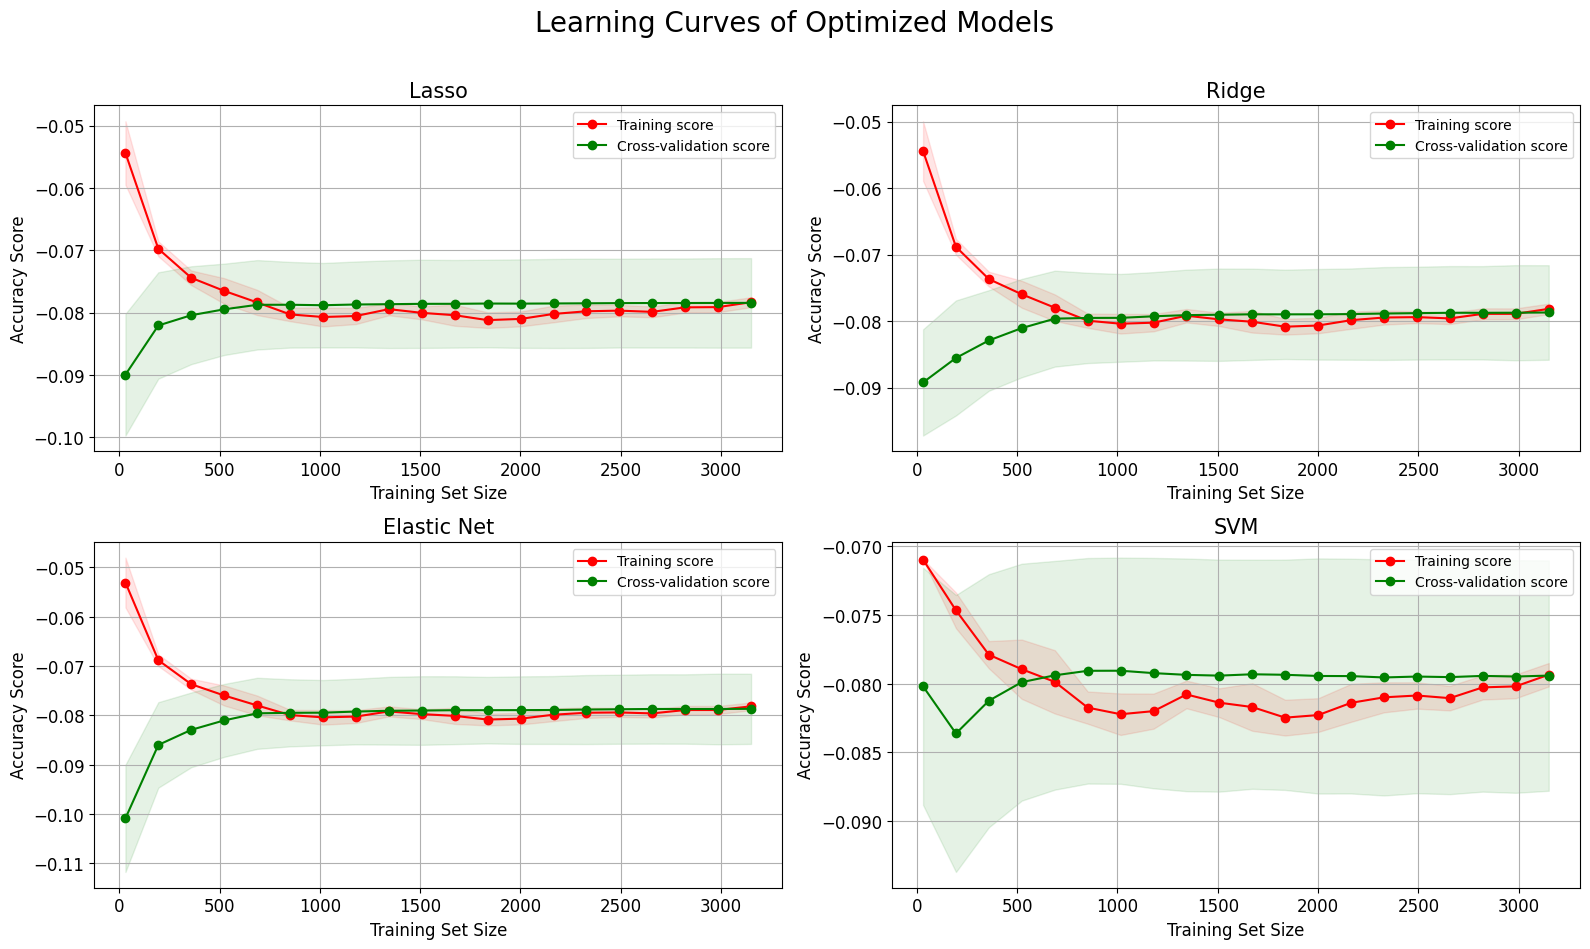

In [211]:


'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,14))
lc_models = [lasso_opt, ridge_opt,elastic_net_opt, svm_opt]
lc_labels = ['Lasso', 'Ridge', 'Elastic Net', 'SVM']

for ax, models, labels in zip (range(1,6), lc_models, lc_labels):
    plt.subplot(3,2,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize = 15)
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])



Ensemble

In [213]:


'''Data frame of our optimized base model predictions.'''
base_model_prediction = pd.DataFrame({'LGB':lgb_opt.predict(test), 'Lasso':lasso_opt.predict(test), 'Ridge':ridge_opt.predict(test), 'GB':gb_opt.predict(test), 'Elastic Net':elastic_net_opt.predict(df_test_final), 'XGB':xgb_opt.predict(test), 'SVM':svm_opt.predict(test)})
bold('**All the Base Model Predictions:**')
display(base_model_prediction.head())



NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [ ]:
my_submission = pd.DataFrame({'Index': test.Index, 'Potability': y_test_hat})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [215]:


"""Now let's build a simple averaging ensemble and predict with it."""

y_svm = svm_opt.predict(test))
y_lgb = lgb_opt.predict(test)
y_gb = gb_opt.predict(test)
y_ridge = ridge_opt.predict(test)

'''Just average the 5 prediction to form final prediction.'''
avg_ensemble = ( y_lgb + y_svm + y_gb + y_ridge)/5
submission_avg = pd.DataFrame()
submission_avg['Index'] = test.Index
submission_avg['Potability'] = avg_ensemble
submission_avg.to_csv('avrage_ensemble.csv', index = False)



NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [220]:

svm_opt.fit(X_train, y_train)
lgb_opt.fit(X_train, y_train)
gb_opt.fit(X_train, y_train)
ridge_opt.fit(X_train, y_train)

# Make predictions
y_svm = svm_opt.predict(test)
y_lgb = lgb_opt.predict(test)
y_gb = gb_opt.predict(test)
y_ridge = ridge_opt.predict(test)

# Average the predictions
avg_ensemble = (y_lgb + y_svm + y_gb + y_ridge) / 4

# Prepare the final submission
submission_avg = pd.DataFrame()
submission_avg['Index'] = test.Index
submission_avg['Potability'] = avg_ensemble

# Save to CSV
submission_avg.to_csv('average_ensemble2.csv', index=False)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319